<a href="https://colab.research.google.com/github/DinurakshanRavichandran/Bank-Subscription-Prediction-Model/blob/main/BankSubscriptionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the data

In [1]:
import pandas as pd

#Load the dataset
file_path = "/content/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')

#Display the first few rows of the dataset
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

Get basic information about the dataset

In [2]:
#Datset information
print("Dataset Information:")
print(df.info())

#Check for null values : expected - 0
print("Null Values:")
print(df.isnull().sum())

#Check for duplicate values : expected - 0
print("Duplicate Values:")
print(df.duplicated().sum())

#Summary statistics for numerical values
print("Summary Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.

In [3]:
#Remove age less than 18

Check class distribution

Target Variable Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


<ipython-input-4-a3ce78c6ba98>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='y', data=df, palette="pastel")


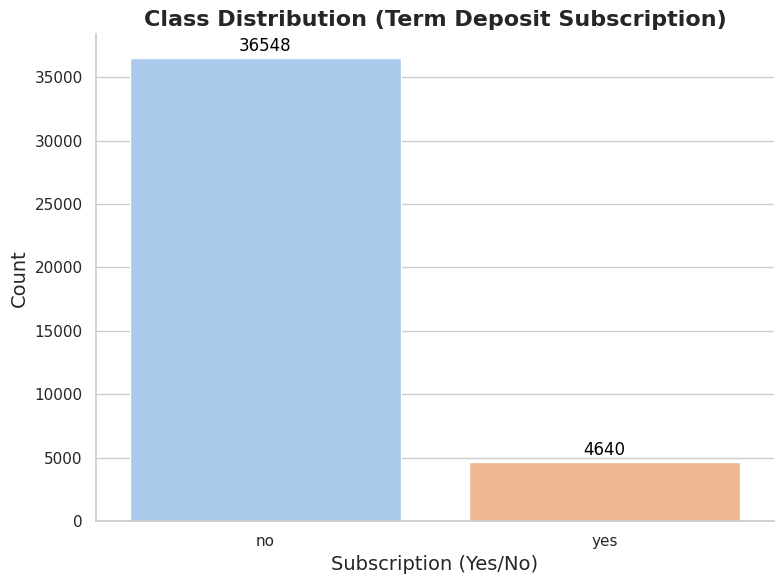

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Target Variable Distribution:")
print(df['y'].value_counts())

# Plot the class distribution
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Calculate the value counts
value_counts = df['y'].value_counts()

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust the figure size
ax = sns.countplot(x='y', data=df, palette="pastel")

# Add title and labels
plt.title("Class Distribution (Term Deposit Subscription)", fontsize=16, fontweight="bold")
plt.xlabel("Subscription (Yes/No)", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Annotate each bar with the count
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

Explore categorical and numerical features

Categorical Columns and Unique Values:
job: 12 unique values
marital: 4 unique values
education: 8 unique values
default: 3 unique values
housing: 3 unique values
loan: 3 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
poutcome: 3 unique values
y: 2 unique values


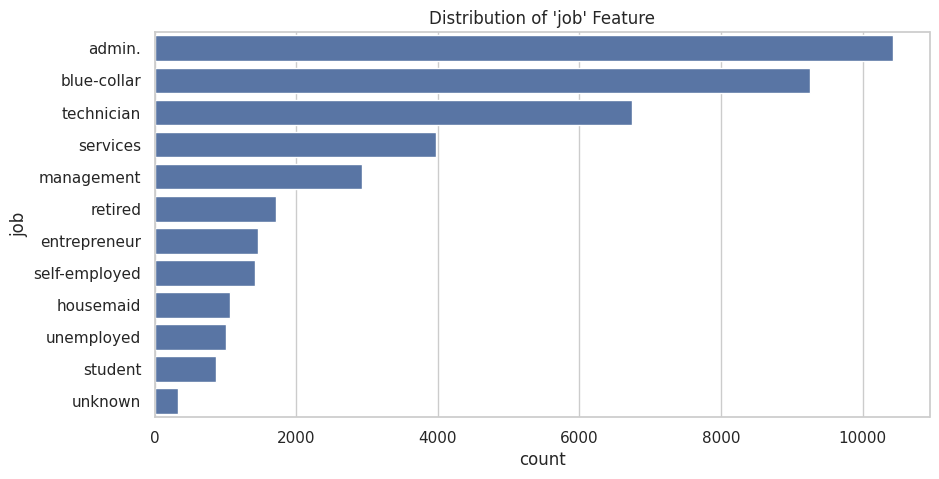

Numerical Columns Statistics:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960     

In [5]:
#Seperate categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Print unique values in categorical columns
print("Categorical Columns and Unique Values:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Visualize a sample categorical column (e.g., 'job')
category = "job"
plt.figure(figsize=(10, 5))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title("Distribution of 'job' Feature")
plt.show()

# Summary statistics for numerical columns
print("Numerical Columns Statistics:")
print(df[numerical_cols].describe())

Check feature correlation

Correlation Matrix for Numerical Features:


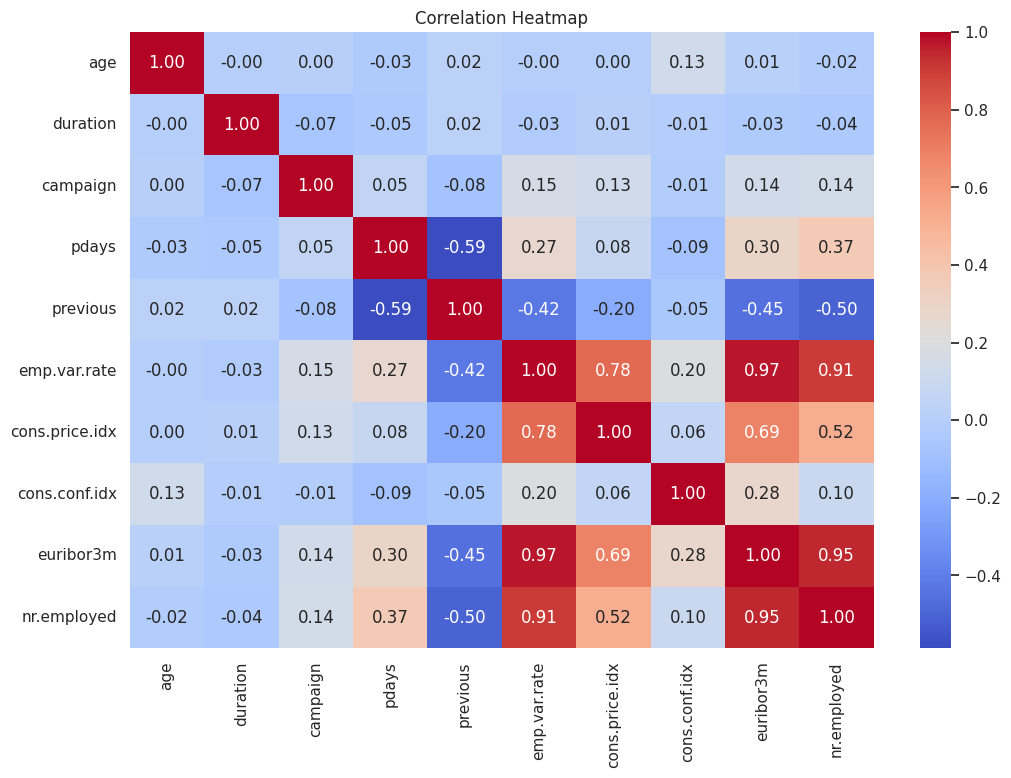

In [6]:
# Correlation matrix
print("Correlation Matrix for Numerical Features:")
correlation_matrix = df[numerical_cols].corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Explore data imbalances and insights

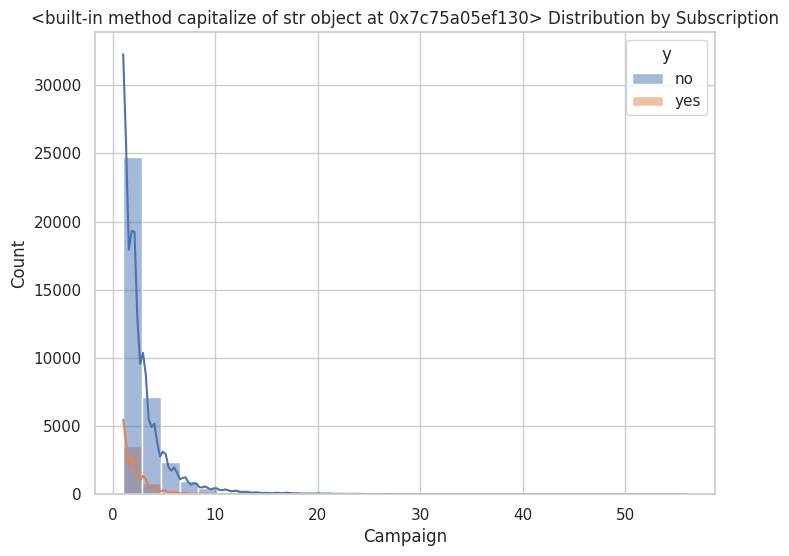

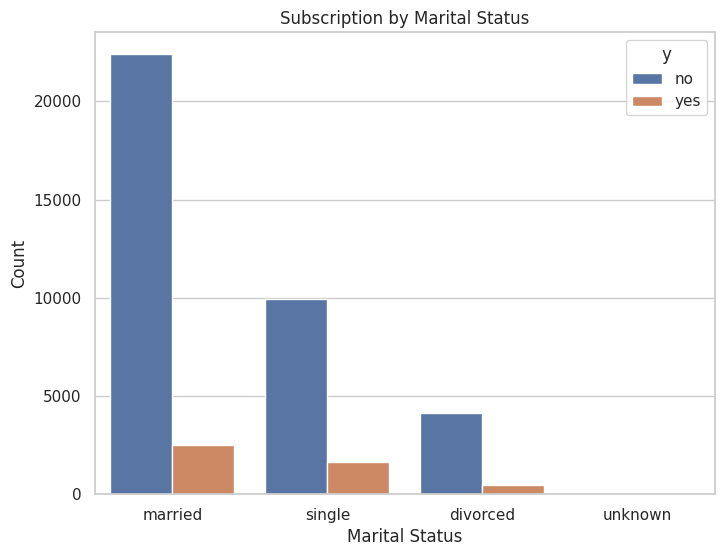

In [7]:
# Relationship between 'feature' and subscription
feature = "campaign"
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x= feature, hue='y', kde=True, bins=30)
plt.title(f"{feature.capitalize} Distribution by Subscription")
plt.xlabel(f"{feature.capitalize()}")
plt.ylabel("Count")
plt.show()

# Analyze a categorical column (e.g., 'marital') vs target
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=df)
plt.title("Subscription by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


## Preprocessing and Data pipeline

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the dataset
file_path = "/content/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')

# Step 1: Clean the dataset
print("Initial Shape:", df.shape)

# Drop duplicate rows
df = df.drop_duplicates()
print("Shape After Removing Duplicates:", df.shape)

# Step 2: Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])  # 'no' -> 0, 'yes' -> 1

# Step 3: Split into features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Step 4: Identify categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Step 5: Preprocessing for categorical and numerical data
# Numerical preprocessing (e.g., scaling, imputation)
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing (e.g., encoding, imputation)
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ]
)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 7: Create the complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Step 8: Transform the training and testing data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

print("Shape of Processed Training Data:", X_train_processed.shape)
print("Shape of Processed Testing Data:", X_test_processed.shape)


Initial Shape: (41188, 21)
Shape After Removing Duplicates: (41176, 21)
Shape of Processed Training Data: (28823, 63)
Shape of Processed Testing Data: (12353, 63)


In [9]:
# Inspect the transformed training data (converted to array)
print("Sample Processed Data (First 5 Rows):")
print(X_train_processed[:5])


Sample Processed Data (First 5 Rows):
[[ 1.6324005  -0.84323307 -0.20335705  0.19711221 -0.34930539 -0.11590358
  -0.6489673  -0.32461783  0.23137643  0.39840326  1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          1.          1.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          1.          0.          0.          0.          0.
   0.          1.          0.        ]
 [ 0.38436677 -0.4390904  -0.56653694  0.19711221 -0.34930539  0.8389245
  -0.22766695  0.95013069  0.77464319  0.84405371  0.          1.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         

Number of Components Selected: 27
Explained Variance Ratio for Each Component: [0.26277013 0.09165329 0.07522529 0.06770962 0.06273771 0.05668316
 0.04458903 0.03071191 0.02931078 0.02580203 0.01973584 0.01777952
 0.01721047 0.01685593 0.01607559 0.01416755 0.01320504 0.01274801
 0.01251425 0.01242512 0.01140719 0.00897161 0.00843302 0.00774079
 0.00741717 0.00581917 0.00523234]
Total Explained Variance: 0.95


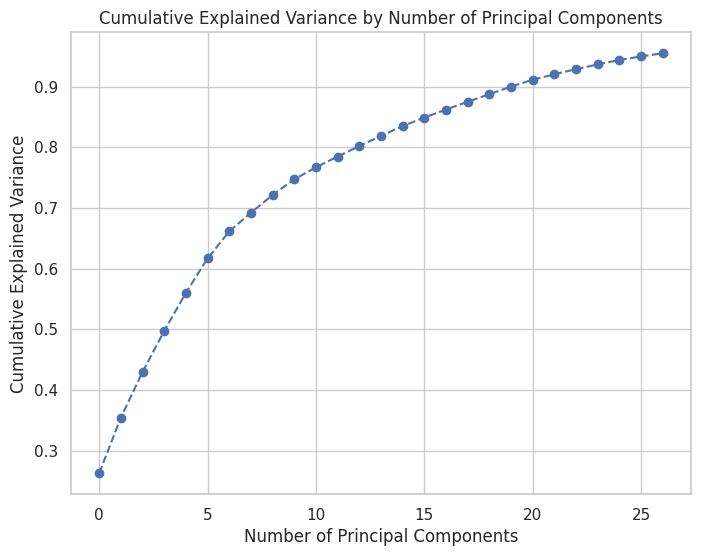

Shape of Training Data after PCA: (28823, 27)
Shape of Testing Data after PCA: (12353, 27)


In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply PCA to the preprocessed data
# Initialize PCA - Start with retaining 95% of the variance
pca = PCA(n_components=0.95, random_state=42)  # Retains 95% of the variance
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Step 2: Check the number of components chosen
print(f"Number of Components Selected: {pca.n_components_}")
print(f"Explained Variance Ratio for Each Component: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.2f}")

# Step 3: Plot the explained variance ratio (Optional)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 4: Inspect the transformed data
print(f"Shape of Training Data after PCA: {X_train_pca.shape}")
print(f"Shape of Testing Data after PCA: {X_test_pca.shape}")


## Model Training

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Scale the output labels for neural networks if necessary


In [13]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the PCA-reduced training data
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the PCA-reduced training data
rf_model.fit(X_train_pca, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test_pca)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_predictions))


Random Forest Accuracy: 0.9091

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10961
           1       0.65      0.43      0.51      1392

    accuracy                           0.91     12353
   macro avg       0.79      0.70      0.73     12353
weighted avg       0.90      0.91      0.90     12353


Confusion Matrix for Random Forest:
[[10635   326]
 [  797   595]]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Scale the PCA data (Neural Networks benefit from scaled inputs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Build the Neural Network model
nn_model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"\nNeural Network Accuracy: {nn_accuracy:.4f}")

# Make predictions on the test data
nn_predictions = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

# Evaluate predictions
print("\nClassification Report for Neural Network:")
print(classification_report(y_test, nn_predictions))
print("\nConfusion Matrix for Neural Network:")
print(confusion_matrix(y_test, nn_predictions))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8955 - loss: 0.2690 - val_accuracy: 0.9075 - val_loss: 0.1942
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9113 - loss: 0.1903 - val_accuracy: 0.9095 - val_loss: 0.1915
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9128 - loss: 0.1836 - val_accuracy: 0.9092 - val_loss: 0.1888
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9165 - loss: 0.1781 - val_accuracy: 0.9101 - val_loss: 0.1879
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9126 - loss: 0.1799 - val_accuracy: 0.9043 - val_loss: 0.1918
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9206 - loss: 0.1706 - val_accuracy: 0.9097 - val_loss: 0.1860
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9233 - loss: 0.1706 - val_accuracy: 0.9111 - val_loss: 0.1876
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9237 - loss: 0.1670 - val_accuracy: 0.

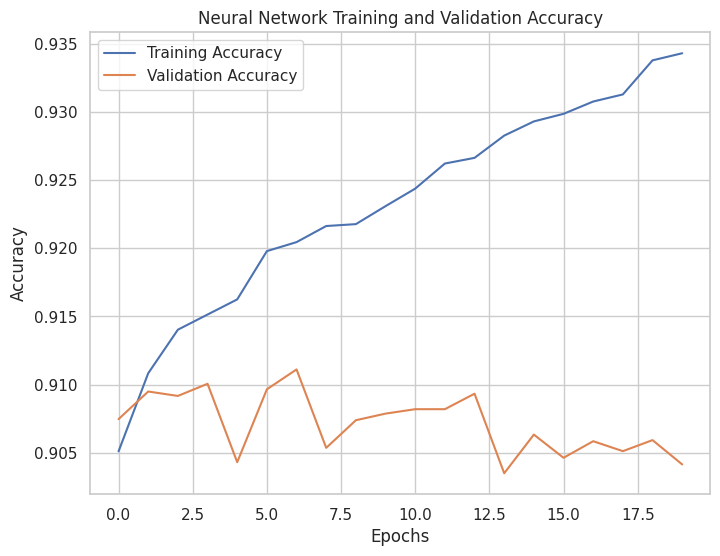

In [16]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
